In [1]:
import pandas as pd
import numpy as np
# Load the data
data = pd.read_csv("cardio_train.csv", delimiter=';')
type(data)


pandas.core.frame.DataFrame

In [2]:
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.shape

(70000, 13)

In [4]:
data.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
29647,42387,21152,2,171,79.0,120,80,1,3,0,0,0,0
66249,94572,20662,1,165,75.0,130,80,1,2,0,0,1,0
49614,70835,21215,1,155,65.0,120,80,2,2,0,0,1,0
17263,24667,19655,1,154,71.0,140,90,3,3,0,0,0,1
14224,20316,22014,1,160,59.0,120,80,1,1,0,0,1,1


## cleaning and understanding our dataset

In [5]:
print(data['cholesterol'].unique())
data['cardio'].nunique()

[1 3 2]


2

In [6]:
data.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [7]:
data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)

In [8]:
info = ["age in days","1: female, 2: male","Height","Weight","Systolic blood pressure","Diastolic blood pressure","Cholesterol | type-1: normal, 2: above normal, 3: well above normal|","Glucose | type-- 1: normal, 2: above normal, 3: well above normal |","Smoking ","Alcohol intake ","Physical activity","Presence or absence of cardiovascular disease"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age in days
gender:			1: female, 2: male
height:			Height
weight:			Weight
ap_hi:			Systolic blood pressure
ap_lo:			Diastolic blood pressure
cholesterol:			Cholesterol | type-1: normal, 2: above normal, 3: well above normal|
gluc:			Glucose | type-- 1: normal, 2: above normal, 3: well above normal |
smoke:			Smoking 
alco:			Alcohol intake 
active:			Physical activity
cardio:			Presence or absence of cardiovascular disease


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69976 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  int64  
 1   gender       69976 non-null  int64  
 2   height       69976 non-null  int64  
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  int64  
 5   ap_lo        69976 non-null  int64  
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  int64  
 9   alco         69976 non-null  int64  
 10  active       69976 non-null  int64  
 11  cardio       69976 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [10]:
data['cholesterol'].value_counts()

1    52361
2     9549
3     8066
Name: cholesterol, dtype: int64

In [11]:
len(data)

69976

In [12]:
# Convert age from days to years
data['age'] = (data['age'] / 365).round().astype(int)
data.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
data['weight'].min()

10.0

In [14]:
data['weight'].max()

200.0

In [15]:
data['height'].min()

55

In [16]:
data['height'].max()

250

### Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.

In [17]:
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

In [18]:
data['height'].max()

180

In [19]:
data['height'].min()

150

In [20]:
data['weight'].max()

106.0

In [21]:
data['weight'].min()

52.0

In [22]:
len(data)

63842

### In addition, in some cases diastolic pressure is higher than systolic, which is also incorrect. How many records are inaccurate in terms of blood pressure?

In [23]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


### Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [24]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

In [25]:
len(data)

60118

In [26]:
data['weight'].value_counts()

65.0    3626
70.0    3493
68.0    2630
60.0    2535
75.0    2525
        ... 
75.2       1
83.5       1
64.3       1
70.3       1
99.9       1
Name: weight, Length: 160, dtype: int64

In [27]:
data['weight']=data['weight'].round().astype(int)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60118 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          60118 non-null  int32
 1   gender       60118 non-null  int64
 2   height       60118 non-null  int64
 3   weight       60118 non-null  int32
 4   ap_hi        60118 non-null  int64
 5   ap_lo        60118 non-null  int64
 6   cholesterol  60118 non-null  int64
 7   gluc         60118 non-null  int64
 8   smoke        60118 non-null  int64
 9   alco         60118 non-null  int64
 10  active       60118 non-null  int64
 11  cardio       60118 non-null  int64
dtypes: int32(2), int64(10)
memory usage: 5.5 MB


In [29]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60118.000000,60118.000000,60118.000000,60118.000000,60118.000000,60118.000000,60118.000000,60118.000000,60118.000000,60118.000000,60118.000000,60118.000000
mean,53.339100,1.347400,164.554842,73.429605,125.772996,81.046891,1.351093,1.220317,0.085665,0.051898,0.803636,0.488306
std,6.747252,0.476148,6.831097,11.615968,13.763981,8.240653,0.670173,0.567703,0.279871,0.221823,0.397250,0.499867
min,30.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Analysing the 'target' variable

In [30]:
data["cardio"].describe()

count    60118.000000
mean         0.488306
std          0.499867
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cardio, dtype: float64

In [31]:
data["cardio"].unique()

array([0, 1], dtype=int64)

##### Clearly, this is a classification problem, with the target variable having values '0' and '1'

In [32]:
print(data.corr()["cardio"].abs().sort_values(ascending=False))

cardio         1.000000
ap_hi          0.428572
ap_lo          0.321583
age            0.236944
cholesterol    0.216610
weight         0.157917
gluc           0.085838
active         0.038579
height         0.030846
smoke          0.023516
alco           0.014779
gender         0.004912
Name: cardio, dtype: float64


# analysing

0    30762
1    29356
Name: cardio, dtype: int64


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


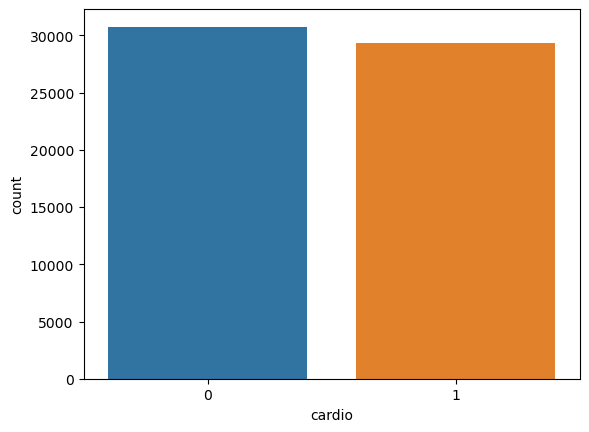

In [33]:
import seaborn as sns

y = data["cardio"]
sns.countplot(y)

target_temp = data.cardio.value_counts()
print(target_temp)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='cardio'>

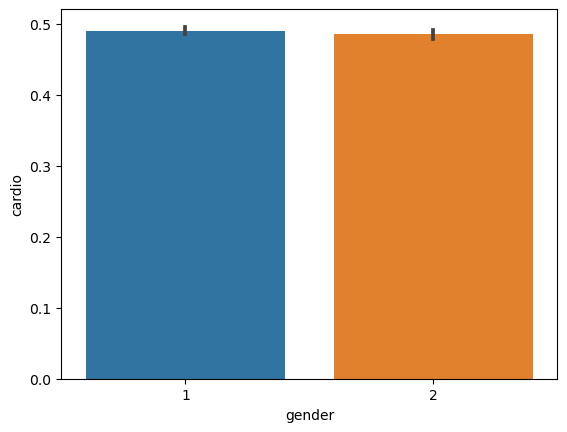

In [34]:
sns.barplot(data["gender"],y)

<AxesSubplot:xlabel='cardio', ylabel='count'>

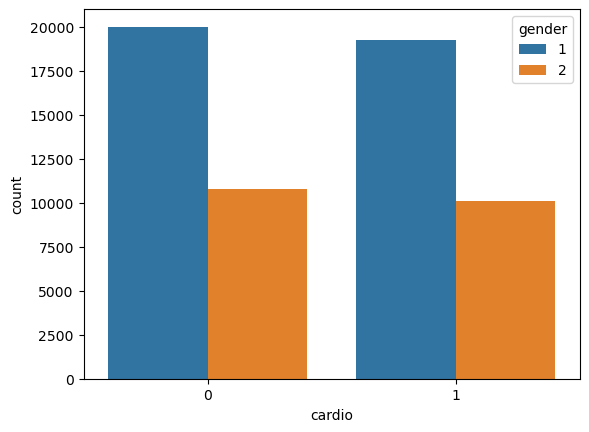

In [35]:
sns.countplot(x='cardio',hue='gender',data=data)

<AxesSubplot:xlabel='cholesterol', ylabel='cardio'>

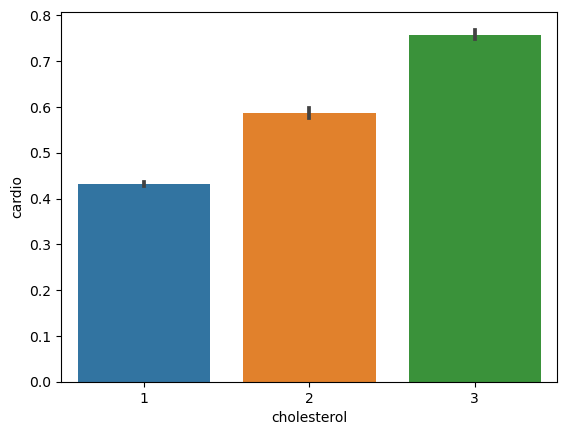

In [36]:
sns.barplot(data=data,x="cholesterol", y="cardio")
# plt.show()

In [37]:
value_counts = data.groupby(["cholesterol", "cardio"]).size()

print(value_counts)

cholesterol  cardio
1            0         25933
             1         19730
2            0          3220
             1          4583
3            0          1609
             1          5043
dtype: int64


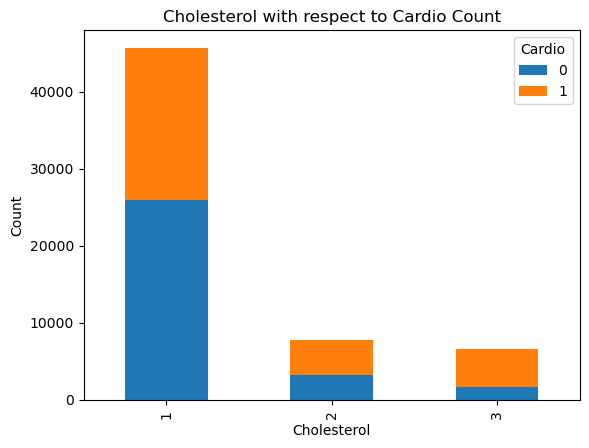

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the value count of "cardio" for each unique "cholesterol" value
value_counts = data.groupby("cholesterol")["cardio"].value_counts().unstack()

# Plot the value counts
ax = value_counts.plot(kind="bar", stacked=True)

# Customize the plot
ax.set_xlabel("Cholesterol")
ax.set_ylabel("Count")
ax.set_title("Cholesterol with respect to Cardio Count")
plt.legend(title="Cardio", loc="upper right")

# Display the plot
plt.show()

<AxesSubplot:xlabel='gluc', ylabel='cardio'>

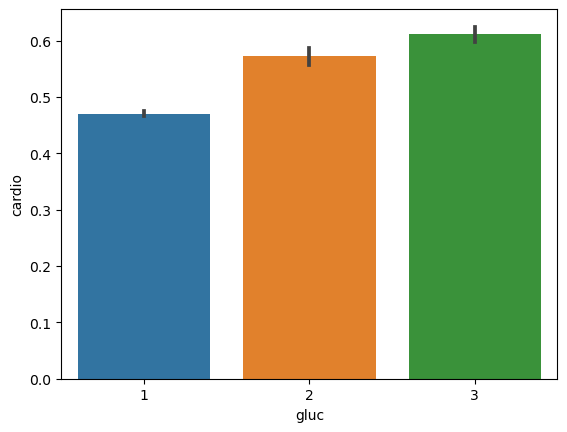

In [39]:
sns.barplot(data=data,x="gluc", y="cardio")
# plt.show()

<AxesSubplot:xlabel='smoke', ylabel='cardio'>

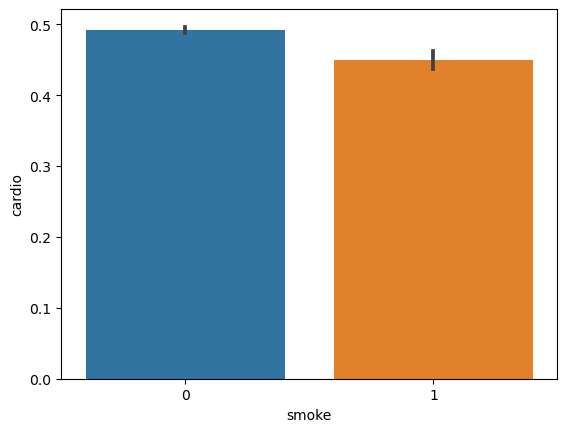

In [40]:
sns.barplot(data=data,x="smoke", y="cardio")
# plt.show()

<AxesSubplot:xlabel='alco', ylabel='cardio'>

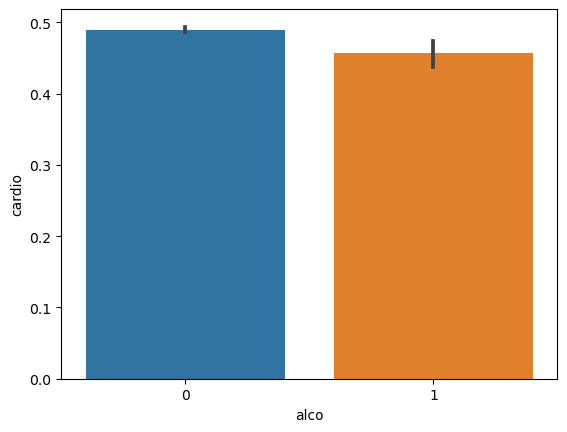

In [41]:
sns.barplot(data=data,x="alco", y="cardio")
# plt.show()

In [42]:
data.groupby('gender')['alco'].sum()

gender
1     973
2    2147
Name: alco, dtype: int64

<AxesSubplot:xlabel='active', ylabel='cardio'>

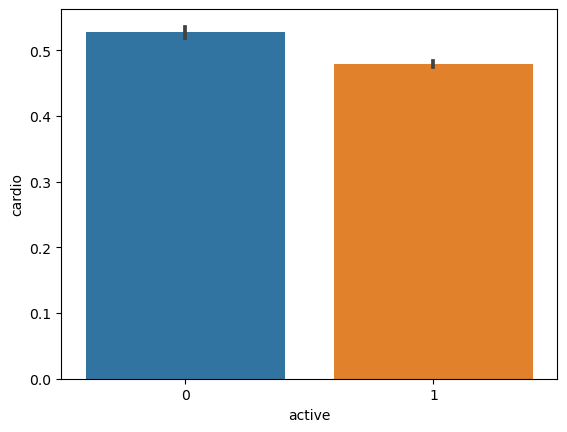

In [43]:
sns.barplot(data=data,x="active", y="cardio")
# plt.show()

<AxesSubplot:ylabel='Frequency'>

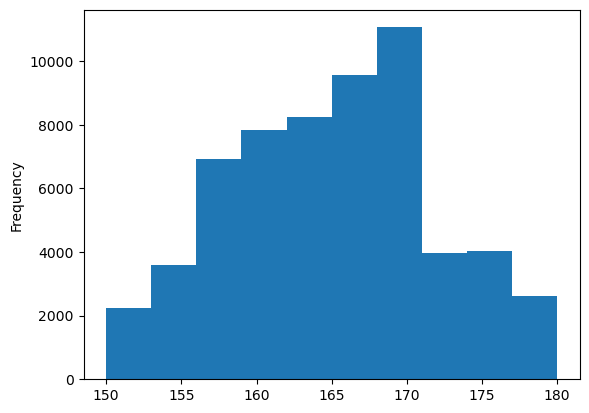

In [44]:
data['height'].plot.hist()#automaticaly count is taken

<AxesSubplot:ylabel='Frequency'>

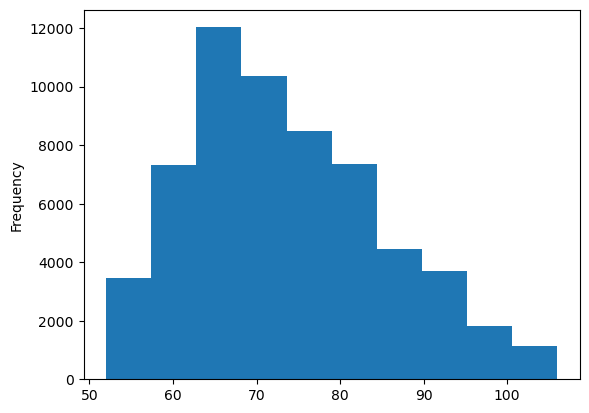

In [45]:
data['weight'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

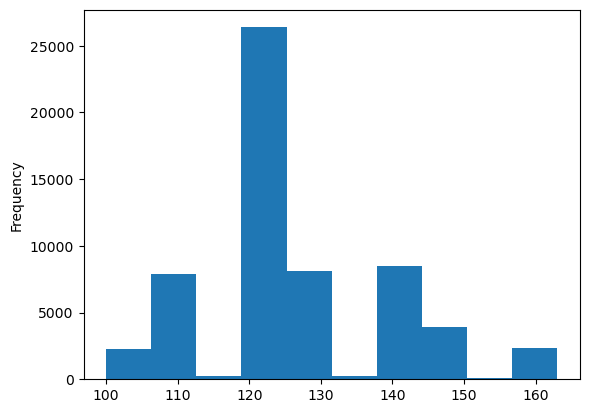

In [46]:
data['ap_hi'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

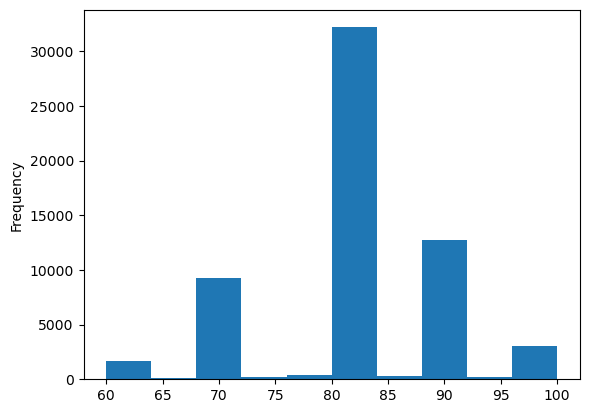

In [47]:
data['ap_lo'].plot.hist()

In [48]:
data['BMI'] = data['weight']/((data['height']/100)**2)

In [49]:
data.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82,150,100,1,1,0,0,1,1,28.710479
4,48,1,156,56,100,60,1,1,0,0,0,0,23.011177


<AxesSubplot:ylabel='Frequency'>

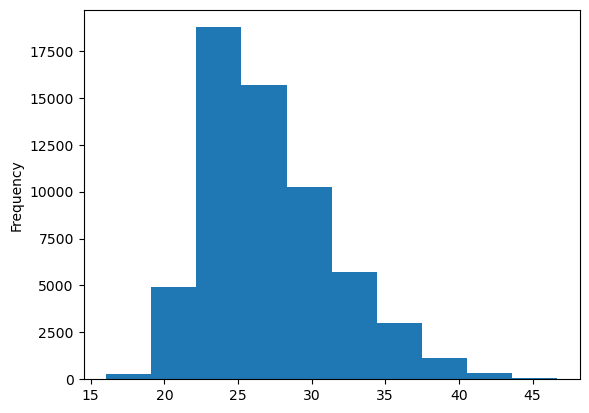

In [50]:
data['BMI'].plot.hist()

Diastilic pressure is higher than systolic one in 0 cases


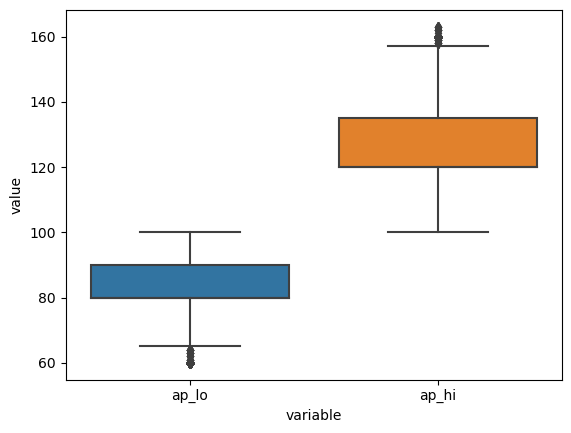

In [51]:
blood_pressure = data.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))